In [2]:
import os
import numpy as np
import shutil
import random
import cv2 as cv2

In [11]:

#Function to split folders of classes to Train , Validation and Test
# SEED is used for reproducible splitting
# IF root dir or/and destination dir are not defined then current directory of project will be used
# 
#Format is like :
#INPUT:
# root_dir/
#   class1/
#       img1.jpg
#       img2.jpg
#       ...
#   class2/
#       img1.jpg
#       img2.jpg
#       ...
#   ...
#
#OUTPUT:
# destination_dir/
#    train/
#        class1/
#            img1.jpg
#            ...
#        class2/
#            img1.jpg
#            ...
#    val/
#        class1/
#            img2.jpg
#            ...
#        class2/
#            imgb.jpg
#            ...
#    test/
#        class1/
#            img3.jpg
#            ...
#        class2/
#           imgc.jpg
#            ...

def folder_splitting_dataset(classes_dir,val_ratio,test_ratio,SEED,root_dir=None,destination_dir=None,create_destination_dirs=True):
    if root_dir==None:
        root_dir=os.getcwd()
    if destination_dir==None:
        destination_dir=root_dir
    np.random.seed(SEED)


    for cls in classes_dir:
        if create_destination_dirs is True:
            os.makedirs(destination_dir +'/train' + '/' + cls)
            os.makedirs(destination_dir +'/val' + '/' + cls)
            os.makedirs(destination_dir +'/test' + '/' + cls)
        

        # Creating partitions of the data after shuffeling
        src = root_dir + '/' + cls  # Folder to copy images from

        allFileNames = os.listdir(src)
        allFileNames.sort()
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
                                                                   int(len(allFileNames)* (1 - test_ratio))])


        train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
        val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
        test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
        
        #print('Class Name: ',cls)
        #print('Total images: ', len(allFileNames))
        #print('Training: ', len(train_FileNames))
        #print('Validation: ', len(val_FileNames))
        #print('Testing: ', len(test_FileNames))

        # Copy-pasting images
        print("Copying Images..")
        for name in train_FileNames:
            shutil.copy(name, destination_dir +'/train'+ '/' + cls)

        for name in val_FileNames:
            shutil.copy(name, destination_dir +'/val'+ '/' + cls)

        for name in test_FileNames:
            shutil.copy(name, destination_dir +'/test'+ '/' + cls)
        print("Class Completed\n")

In [12]:
classes_dir=['0','1']
destination_dir='C:\\Users\\Stelios\\Desktop\\Breast Histopathology\\IDC_split\\'
patient_list="C:\\Users\\Stelios\\Desktop\\Breast Histopathology\\IDC_regular_ps50_idx5"
for dir1 in os.listdir(patient_list):
    root=patient_list+"\\"+dir1
    folder_splitting_dataset(classes_dir,0.2,0.1,100,root_dir=root,destination_dir=destination_dir,create_destination_dirs=False)
    print("Patient:"+dir1+" Complete")

Copying Images..
Class Completed

Copying Images..
Class Completed

Patient:10253 Complete
Copying Images..
Class Completed

Copying Images..
Class Completed

Patient:10254 Complete
Copying Images..
Class Completed

Copying Images..
Class Completed

Patient:10255 Complete
Copying Images..
Class Completed

Copying Images..
Class Completed

Patient:10256 Complete
Copying Images..
Class Completed

Copying Images..
Class Completed

Patient:10257 Complete
Copying Images..
Class Completed

Copying Images..
Class Completed

Patient:10258 Complete
Copying Images..
Class Completed

Copying Images..
Class Completed

Patient:10259 Complete
Copying Images..
Class Completed

Copying Images..
Class Completed

Patient:10260 Complete
Copying Images..
Class Completed

Copying Images..
Class Completed

Patient:10261 Complete
Copying Images..
Class Completed

Copying Images..
Class Completed

Patient:10262 Complete
Copying Images..
Class Completed

Copying Images..
Class Completed

Patient:10264 Complete

In [15]:
def load_dataset(img_folder,grayScaled,normalized,IMG_HEIGHT,IMG_WIDTH):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path )
            if grayScaled:
                image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            if normalized:
                image /= 255 
                
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

In [16]:
img_data, class_name =load_dataset("C:\\Users\\Stelios\\Desktop\\Breast Histopathology\\IDC_split\\val",False,True,50,50)
valX=np.array(img_data)
dictY={k: v for v, k in enumerate(np.unique(class_name))}
valY=  [dictY[class_name[i]] for i in range(len(class_name))]
np.save('valX.npy', valX)
np.save("valY.npy",valY)

img_data, class_name =load_dataset("C:\\Users\\Stelios\\Desktop\\Breast Histopathology\\IDC_split\\train",False,True,50,50)

trainX=np.array(img_data)
dictY={k: v for v, k in enumerate(np.unique(class_name))}
trainY=  [dictY[class_name[i]] for i in range(len(class_name))]
np.save('trainX.npy', trainX)
np.save("trainY.npy",trainY)



In [21]:
img_data, class_name =load_dataset("C:\\Users\\Stelios\\Desktop\\Breast Histopathology\\IDC_split\\test",False,True,50,50)
testX=np.array(img_data)
dictY={k: v for v, k in enumerate(np.unique(class_name))}
testY=  [dictY[class_name[i]] for i in range(len(class_name))]
np.save('testX.npy', testX)
np.save("testY.npy",testY)

In [3]:
xx=np.load('testX.npy')

In [4]:
xx.shape

(28000, 50, 50, 3)

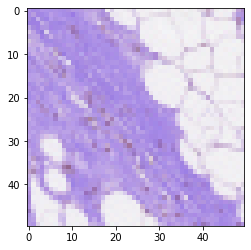